In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

### EDA

In [62]:
df = pd.read_csv("happiness_ind_18.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [63]:
df[df["Country or region"] == "India"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
132,133,India,4.19,0.721,0.747,0.485,0.539,0.172,0.093


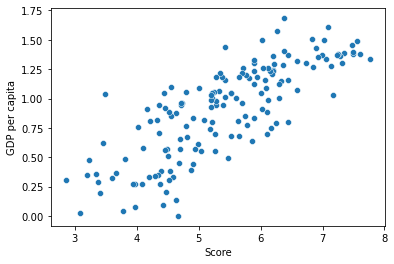

In [10]:
sns.scatterplot(x = df["Score"],y = df["GDP per capita"])
plt.show()

In [64]:
cols = df.columns
for i in range(3,len(cols)):
    corr = df["Score"].corr(df[cols[i]])
    print(f"Score - {cols[i]} : {corr}")

Score - GDP per capita : 0.8021239467301907
Score - Social support : 0.7457601649725755
Score - Healthy life expectancy : 0.7758136033302464
Score - Freedom to make life choices : 0.5442799358332935
Score - Generosity : 0.13582474708113781
Score - Perceptions of corruption : 0.4084052796677772


<AxesSubplot:>

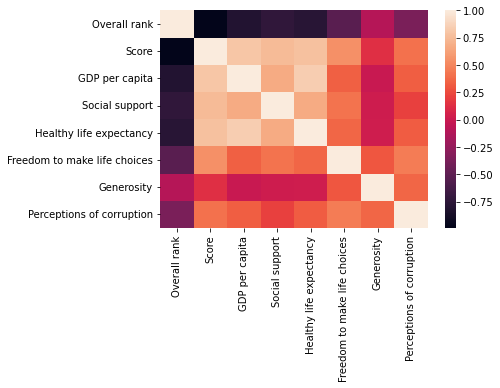

In [65]:
sns.heatmap(df.corr())

### Model
will train the model on 2018 data and will test the model on 2019 data.

In [66]:
rg = linear_model.LinearRegression()
# rg.fit(independent variable,depandent variable)
# y = mX + c
# rg.fit(X, y), where X represents the input features and y represents the target values.
rg.fit(df[["GDP per capita"]],df["Score"])

LinearRegression()

In [67]:
rg.predict([[1.340]])

array([6.40365244])

In [74]:
# for y = mX + c
m = rg.coef_
c = rg.intercept_
print(m,c)

[2.29123362] 3.3333993932306143


## Results for Linear Regression in single variable

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

predicted = [rg.predict([[x]])[0] for x in df["GDP per capita"]]

df_19 = pd.read_csv("happiness_ind.csv")

actual = df_19["GDP per capita"].tolist()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, predicted)
print("MAE:", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(actual, predicted)
print("MSE:", mse)

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print("RMSE:", rmse)

# R-squared (Coefficient of Determination)
r2 = r2_score(actual, predicted)
print("R-squared:", r2)

MAE: 4.47076923076923
MSE: 20.468491361484638
RMSE: 4.524211683982596
R-squared: -128.7965188930171
